# Goal: Clean my historical bankruptcy data in order to run a logistical regression

In [1]:
# import the tools I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
#import my bankruptcy CSV (cut down in previous file)
bank_db = pd.read_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_2/UFL/Bankruptcy_Data_v1.csv', index_col='NameCorp')

In [3]:
bank_db.head()

,Unnamed: 0,CommonName,AfterEmerging,CikBefore,CikEmerging,Chapter,MonthsIn,SICDescription,SICDivision,SICIndustryGroup,...,EbitEmerging,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore,CommEquity
NameCorp,,,,,,,,,,,,,,,,,,,,,
1st Centennial Bancorp,0,NaN,NaN,1097081.0,NaN,7,NaN,State Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,...,NaN,NaN,690.000,NaN,690.000,NaN,637.000,NaN,637.000,Chapter 7 at filing
"21st Century Oncology Holdings, Inc.",1,NaN,NaN,1503518.0,NaN,11,7.700000,Offices and Clinics of Doctors of Medicine,I: Services,801 Offices And Clinics Of Doctors Of Medicine,...,NaN,NaN,1128.244,NaN,1128.244,NaN,1394.127,NaN,1394.127,no
"A. H. Robins Company, Inc.",2,NaN,Became a unit of American Home Products 12/15/89,NaN,NaN,11,35.633333,Pharmaceutical Preparations,D: Manufacturing,283 Drugs,...,NaN,648.000,509.663,439.983,648.000,NaN,153.826,118.898,153.826,yes
A. M. Castle & Co.,3,NaN,NaN,18172.0,18172.0,11,1.500000,Metals Service Centers and Offices,F: Wholesale Trade,"505 Metals and Minerals, Except Petroleum",...,-24.088,329.328,NaN,NaN,329.328,364.455,NaN,NaN,364.455,no
"A123 Systems, Inc.",4,NaN,assets acquired by Wanxiang America Corporatio...,1167178.0,NaN,11,7.200000,NaN,D: Manufacturing,"369 Miscellaneous Electrical Machinery, Equipm...",...,NaN,625.902,NaN,NaN,625.902,329.537,NaN,NaN,329.537,no


In [4]:
#make sure my data is all here
bank_db.shape

(1218, 39)

Looks like it's all there.

***
# I need to find an eliminate nulls, or otherwise decide how to address each
- I will attempt to keep as much data as possible before dropping columns or rows

Questions as I go:
- Do I have to deal with missing data?
- Are any of the features really skewed? Can I transform them?
- Is scaling required for this data set?

In [5]:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1st Centennial Bancorp to Ziff Davis Holdings Inc.
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1218 non-null   int64  
 1   CommonName        112 non-null    object 
 2   AfterEmerging     549 non-null    object 
 3   CikBefore         992 non-null    float64
 4   CikEmerging       369 non-null    float64
 5   Chapter           1218 non-null   object 
 6   MonthsIn          1182 non-null   float64
 7   SICDescription    975 non-null    object 
 8   SICDivision       1218 non-null   object 
 9   SICIndustryGroup  1145 non-null   object 
 10  SICMajGroup       1218 non-null   object 
 11  SICPrimary        1218 non-null   int64  
 12  Voluntary         1218 non-null   object 
 13  YearConfirmed     1096 non-null   float64
 14  YearDisposed      1182 non-null   float64
 15  YearEmerged       817 non-null    float64
 16  YearFi

In [6]:
# Where are my nulls?
bank_db.isna().sum()

Unnamed: 0             0
CommonName          1106
AfterEmerging        669
CikBefore            226
CikEmerging          849
Chapter                0
MonthsIn              36
SICDescription       243
SICDivision            0
SICIndustryGroup      73
SICMajGroup            0
SICPrimary             0
Voluntary              0
YearConfirmed        122
YearDisposed          36
YearEmerged          401
YearFiled              0
Date10k1Before       305
Date10k2Before       675
Date10k3Before       886
Date10kBefore          0
Sales1Before         285
Sales2Before         649
Sales3Before         819
SalesBefore            1
EbitBefore            29
EbitCurrDollars       29
EbitdaBefore         114
EbitdaEmerging       838
EbitEmerging         830
Assets1Before        305
Assets2Before        672
Assets3Before        900
AssetsBefore           0
Liab1Before          329
Liab2Before          791
Liab3Before         1110
LiabBefore            19
CommEquity             0
dtype: int64

- I can probably drop 'CommonName' as it is another "dba" name for NameCorp
- I may want to drop CIK before modeling as this is a unique identifier (certianly not a number)
    - CIK emerging could be an interesting opportunity to engineer a feature, to have a cik once emerging implies the bankrupt company remerged as a 'public' in some capacity (this may range from standalone to acquired, however)
- SIC primary likely needs to become a string (again, not really a number)
- General note: I need to investigate SIC Codes, data dict indicates these may be feature-engineered already
- SIC PRIMARY is the MAIN ONE
    
    

Probably will Drop:
- SIC Description (helper for SIC code)
- Common Equity: I thought this was a BS item, turns out its whether the CommonEquity got representation in the bankruptcy proceeding


To Do:
- At end, add a column for all rows for 'is bankrupt' =1 (since there inclusion here requres they filed for bankruptcy)

In [7]:
# Going to make a list of column header names that contain a null:

# Will first make a general list of all column names
og_column_names = bank_db.columns.to_list()

cols_w_nulls = [] #initialize an empty list
for i in og_column_names:
    if bank_db[i].isnull().any():
        cols_w_nulls.append(i)

print(len(og_column_names))  #cols I began with       
len(cols_w_nulls)            #cols with nulls

39


29

In [8]:
cols_w_nulls

['CommonName',
 'AfterEmerging',
 'CikBefore',
 'CikEmerging',
 'MonthsIn',
 'SICDescription',
 'SICIndustryGroup',
 'YearConfirmed',
 'YearDisposed',
 'YearEmerged',
 'Date10k1Before',
 'Date10k2Before',
 'Date10k3Before',
 'Sales1Before',
 'Sales2Before',
 'Sales3Before',
 'SalesBefore',
 'EbitBefore',
 'EbitCurrDollars',
 'EbitdaBefore',
 'EbitdaEmerging',
 'EbitEmerging',
 'Assets1Before',
 'Assets2Before',
 'Assets3Before',
 'Liab1Before',
 'Liab2Before',
 'Liab3Before',
 'LiabBefore']

In [9]:
# Removing columns I know I will not use / are not heplful

labels_to_drop = ['Unnamed: 0', #old index column
                'CommonName', # vast majority are nulls, dupliciative of NameCorp (index)
                'AfterEmerging', # text column explaining what happened to company, all are uniques
                'CikBefore', # this is a unique identifier for the SEC filing system, also lost leading zeroes
                'CikEmerging' # same as above and even more nulls, will revisit this col in next analysis
                 ]

bank_db.drop(labels=labels_to_drop, axis=1,inplace=True) #I am modifying my database
len(bank_db.columns)

34

In [12]:
# Making a new list of column names after removing four
column_list_2 = bank_db.columns.to_list()
column_list_2

['Chapter',
 'MonthsIn',
 'SICDescription',
 'SICDivision',
 'SICIndustryGroup',
 'SICMajGroup',
 'SICPrimary',
 'Voluntary',
 'YearConfirmed',
 'YearDisposed',
 'YearEmerged',
 'YearFiled',
 'Date10k1Before',
 'Date10k2Before',
 'Date10k3Before',
 'Date10kBefore',
 'Sales1Before',
 'Sales2Before',
 'Sales3Before',
 'SalesBefore',
 'EbitBefore',
 'EbitCurrDollars',
 'EbitdaBefore',
 'EbitdaEmerging',
 'EbitEmerging',
 'Assets1Before',
 'Assets2Before',
 'Assets3Before',
 'AssetsBefore',
 'Liab1Before',
 'Liab2Before',
 'Liab3Before',
 'LiabBefore',
 'CommEquity']

In [17]:
# Another (now shorter!) list of cols with nulls
cols_w_nulls_2 = [] #initialize an empty list
for i in column_list_2:
    if bank_db[i].isnull().any():
        cols_w_nulls_2.append(i)

print(len(cols_w_nulls_2))
cols_w_nulls_2

25


['MonthsIn',
 'SICDescription',
 'SICIndustryGroup',
 'YearConfirmed',
 'YearDisposed',
 'YearEmerged',
 'Date10k1Before',
 'Date10k2Before',
 'Date10k3Before',
 'Sales1Before',
 'Sales2Before',
 'Sales3Before',
 'SalesBefore',
 'EbitBefore',
 'EbitCurrDollars',
 'EbitdaBefore',
 'EbitdaEmerging',
 'EbitEmerging',
 'Assets1Before',
 'Assets2Before',
 'Assets3Before',
 'Liab1Before',
 'Liab2Before',
 'Liab3Before',
 'LiabBefore']

## Cleaning 'Months In' (bankruptcy court)

In [18]:
bank_db['MonthsIn']

NameCorp
1st Centennial Bancorp                        NaN
21st Century Oncology Holdings, Inc.     7.700000
A. H. Robins Company, Inc.              35.633333
A. M. Castle & Co.                       1.500000
A123 Systems, Inc.                       7.200000
                                          ...    
York Research Corporation (2002)        10.500000
Young Broadcasting, Inc.                15.033333
Zale Corp.                              16.833333
Zenith Electronics Corp.                 2.466667
Ziff Davis Holdings Inc.                 3.466667
Name: MonthsIn, Length: 1218, dtype: float64

<AxesSubplot: >

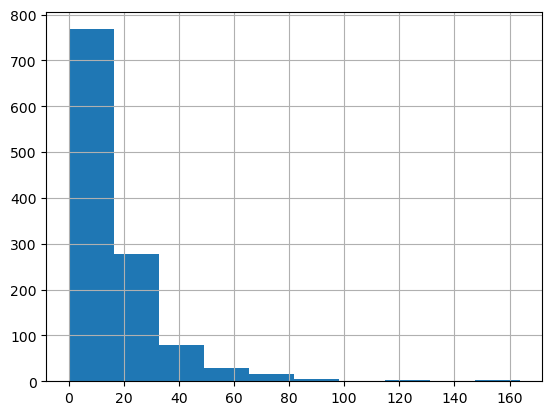

In [19]:
#visualizing this out of curiosity
bank_db['MonthsIn'].hist()

In [20]:
bank_db['MonthsIn'].describe()

count    1182.000000
mean       16.190299
std        17.288843
min         0.133333
25%         4.941667
50%        11.416667
75%        20.533333
max       163.700000
Name: MonthsIn, dtype: float64

Looks like most bankruptcies in this dataset are resolved roughly a year.  The rigthward skew is notable.  Would make sense if some bankruptcies are dragged out (2008 vintage?)

In [21]:
# Looking at all the cases where MonthsIn is null:
bank_db.loc[bank_db['MonthsIn'].isnull()]

,Chapter,MonthsIn,SICDescription,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearConfirmed,YearDisposed,...,EbitEmerging,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore,CommEquity
NameCorp,,,,,,,,,,,,,,,,,,,,,
1st Centennial Bancorp,7,NaN,State Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6022,voluntary,NaN,NaN,...,NaN,NaN,690.000,NaN,690.000000,NaN,637.000,NaN,637.000000,Chapter 7 at filing
"Anthracite Capital, Inc.",7,NaN,Real Estate Investment Trusts,"H: Finance, Insurance, And Real Estate",679 Miscellaneous Investing,67 Holding And Other Investment Offices,6798,voluntary,NaN,NaN,...,NaN,NaN,3827.000,NaN,3827.000000,NaN,3163.000,NaN,3163.000000,Chapter 7 at filing
"AP Industries, Inc.",11,NaN,Motor Vehicle Parts and Accessories,D: Manufacturing,371 Motor Vehicles and Equipment,37 Transportation Equipment,3714,involuntary,NaN,NaN,...,NaN,NaN,191.941,307.000,191.941000,NaN,208.810,NaN,208.810000,no data in published sources
"Armstrong Flooring, Inc.",11,NaN,"Plastics Products, Not Elsewhere Classified",D: Manufacturing,308 Miscellaneous Plastics Products,30 Rubber and Miscellaneous Plastics Products,3089,voluntary,NaN,NaN,...,NaN,517.000000,NaN,NaN,517.000000,317.800000,NaN,NaN,317.800000,case not disposed
Bank Holdings,7,NaN,State Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6022,voluntary,NaN,NaN,...,NaN,496.772000,NaN,NaN,496.772000,503.000000,NaN,NaN,503.000000,Chapter 7 at filing
"Beach First National Bancshares, Inc.",7,NaN,National Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6021,voluntary,NaN,NaN,...,NaN,NaN,669.000,NaN,669.000000,NaN,619.000,NaN,619.000000,Chapter 7 at filing
"Clovis Oncology, Inc.",11,NaN,Pharmaceutical Preparations,D: Manufacturing,283 Drugs,28 Chemicals and Allied Products,2834,voluntary,NaN,NaN,...,NaN,472.833000,NaN,NaN,472.833000,751.673000,NaN,NaN,751.673000,case not disposed
Community Bancorp,7,NaN,National Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6021,voluntary,NaN,NaN,...,NaN,NaN,NaN,1694.000,1694.000000,NaN,NaN,1458.000,1458.000000,Chapter 7 at filing
"Cooperative Bankshares, Inc.",7,NaN,"Savings Institutions, Not Federally Chartered","H: Finance, Insurance, And Real Estate",603 Savings Institutions,60 Depository Institutions,6036,voluntary,NaN,NaN,...,NaN,950.954000,NaN,NaN,950.954000,931.000000,NaN,NaN,931.000000,Chapter 7 at filing


Some of the other columns seem to correspondingly have nulls...

My 36 MonthsIn nulls correspond in full with nulls in YearConfirmed, YearDisposed, EbitdaEmerging, EbitEmerging.

I know from the data dictionary that MonthIn is a calc interpolated from (in the larger dataset) the filing date adn the confirmation date.  Hence, I conclude that some of these either still havent or never were confirmed / exited bankruptcy.
 
 Since my model is attempting to predict a filing of bankruptcy and NOT details of how the bankruptcy will go, I am going to remove the COLUMNS here vs the rows.  I suspect some of these more incomplete cases will ultimately be removed but bankruptcy details will not be why.

In [22]:
bank_db.loc[bank_db['MonthsIn'].isnull()].isna().sum()

Chapter              0
MonthsIn            36
SICDescription       2
SICDivision          0
SICIndustryGroup     1
SICMajGroup          0
SICPrimary           0
Voluntary            0
YearConfirmed       36
YearDisposed        36
YearEmerged         35
YearFiled            0
Date10k1Before      16
Date10k2Before      19
Date10k3Before      30
Date10kBefore        0
Sales1Before        15
Sales2Before        21
Sales3Before        32
SalesBefore          0
EbitBefore           1
EbitCurrDollars      1
EbitdaBefore         2
EbitdaEmerging      36
EbitEmerging        36
Assets1Before       16
Assets2Before       21
Assets3Before       32
AssetsBefore         0
Liab1Before         17
Liab2Before         22
Liab3Before         34
LiabBefore           1
CommEquity           0
dtype: int64

In [23]:
# Removing 'MonthsIn', 'YearConfirmed', 'YearDisposed'

bank_db.drop(labels=['MonthsIn', 'YearConfirmed', 'YearDisposed'], axis=1, inplace=True) #Modifying my original dataframe
bank_db

31


,Chapter,SICDescription,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearEmerged,YearFiled,Date10k1Before,...,EbitEmerging,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore,CommEquity
NameCorp,,,,,,,,,,,,,,,,,,,,,
1st Centennial Bancorp,7,State Commercial Banks,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6022,voluntary,NaN,2009,NaN,...,NaN,NaN,690.000,NaN,690.000000,NaN,637.000,NaN,637.000000,Chapter 7 at filing
"21st Century Oncology Holdings, Inc.",11,Offices and Clinics of Doctors of Medicine,I: Services,801 Offices And Clinics Of Doctors Of Medicine,80 Health Services,8011,voluntary,2018.0,2017,NaN,...,NaN,NaN,1128.244,NaN,1128.244000,NaN,1394.127,NaN,1394.127000,no
"A. H. Robins Company, Inc.",11,Pharmaceutical Preparations,D: Manufacturing,283 Drugs,28 Chemicals and Allied Products,2834,voluntary,1988.0,1985,1984-12-31,...,NaN,648.000000,509.663,439.983,648.000000,NaN,153.826,118.898,153.826000,yes
A. M. Castle & Co.,11,Metals Service Centers and Offices,F: Wholesale Trade,"505 Metals and Minerals, Except Petroleum",50 Wholesale Trade-durable Goods,5051,voluntary,2017.0,2017,2016-12-31,...,-24.088,329.328000,NaN,NaN,329.328000,364.455000,NaN,NaN,364.455000,no
"A123 Systems, Inc.",11,NaN,D: Manufacturing,"369 Miscellaneous Electrical Machinery, Equipm...",36 Electronic And Other Electrical Equipment A...,3690,voluntary,2012.0,2012,2011-12-31,...,NaN,625.902000,NaN,NaN,625.902000,329.537000,NaN,NaN,329.537000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
York Research Corporation (2002),11,Cogeneration Services & Small Power Producers,"E: Transportation, Communications, Electric, Gas",499,"49 Electric, Gas, And Sanitary Services",4991,involuntary,2002.0,2001,2001-02-28,...,NaN,263.451157,NaN,NaN,263.451157,219.292443,NaN,NaN,219.292443,no
"Young Broadcasting, Inc.",11,Television Broadcasting Stations,"E: Transportation, Communications, Electric, Gas",483 Radio And Television Broadcasting Stations,48 Communications,4833,voluntary,2010.0,2009,2008-12-31,...,NaN,348.222526,NaN,NaN,348.222526,936.056160,NaN,NaN,936.056160,no
Zale Corp.,11,Jewelry Stores,G: Retail Trade,594 Miscellaneous Shopping Goods Stores,59 Miscellaneous Retail,5944,involuntary,1993.0,1992,1991-03-31,...,48.967,1789.178000,2013.247,1450.000,1789.178000,1439.176000,1679.640,NaN,1439.176000,no


## Cleaning SIC Codes

In [29]:
bank_db[['SICDescription','SICDivision','SICIndustryGroup','SICMajGroup','SICPrimary']].head(30)

KeyError: "['SICDescription'] not in index"

Reading the Data Dict, these are all derivative of 'SICPrimary'.  There is some nice detail included here, but I'm afraid that it is essentially redundant, particularly 'SICDescription' appear sto be 'SICIndustryGroup' without the leading number.

It is worthwile to note that the SIC Code can be parsed:
- First two digits make up a 'Major Group'
- First three digits make up 'Industry Group'

These increasingly-granular groupings could be a useful categorical feature opportunity to spot groups of bankruptcies by Division / Major Group / Industry Group / SIC Code in future analysis.


I will drop SIC Description as it is redundant.

SICPrimary must be renamed from an int64 type number as well.

I'm going to run value counts on Industry and Major groupings to see if I can detect any clerical errors (if there are I can overwrite the columns by taking the corresponding 2 or 3 digits from SIC Primary.

In [28]:
# Drop 'SICDescription'

bank_db.drop('SICDescription',axis=1,inplace=True)
bank_db.head() # visual check

,Chapter,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearEmerged,YearFiled,Date10k1Before,Date10k2Before,...,EbitEmerging,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore,CommEquity
NameCorp,,,,,,,,,,,,,,,,,,,,,
1st Centennial Bancorp,7,"H: Finance, Insurance, And Real Estate",602 Commercial Banks,60 Depository Institutions,6022,voluntary,NaN,2009,NaN,2007-12-31,...,NaN,NaN,690.000,NaN,690.000,NaN,637.000,NaN,637.000,Chapter 7 at filing
"21st Century Oncology Holdings, Inc.",11,I: Services,801 Offices And Clinics Of Doctors Of Medicine,80 Health Services,8011,voluntary,2018.0,2017,NaN,2015-12-31,...,NaN,NaN,1128.244,NaN,1128.244,NaN,1394.127,NaN,1394.127,no
"A. H. Robins Company, Inc.",11,D: Manufacturing,283 Drugs,28 Chemicals and Allied Products,2834,voluntary,1988.0,1985,1984-12-31,1983-12-31,...,NaN,648.000,509.663,439.983,648.000,NaN,153.826,118.898,153.826,yes
A. M. Castle & Co.,11,F: Wholesale Trade,"505 Metals and Minerals, Except Petroleum",50 Wholesale Trade-durable Goods,5051,voluntary,2017.0,2017,2016-12-31,NaN,...,-24.088,329.328,NaN,NaN,329.328,364.455,NaN,NaN,364.455,no
"A123 Systems, Inc.",11,D: Manufacturing,"369 Miscellaneous Electrical Machinery, Equipm...",36 Electronic And Other Electrical Equipment A...,3690,voluntary,2012.0,2012,2011-12-31,NaN,...,NaN,625.902,NaN,NaN,625.902,329.537,NaN,NaN,329.537,no


In [40]:
bank_db['SICPrimary'] = bank_db['SICPrimary'].astype('object')

In [41]:
# change 'SICPrimary' datatype to something non-numeric
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1st Centennial Bancorp to Ziff Davis Holdings Inc.
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chapter           1218 non-null   object 
 1   SICDivision       1218 non-null   object 
 2   SICIndustryGroup  1145 non-null   object 
 3   SICMajGroup       1218 non-null   object 
 4   SICPrimary        1218 non-null   object 
 5   Voluntary         1218 non-null   object 
 6   YearEmerged       817 non-null    float64
 7   YearFiled         1218 non-null   int64  
 8   Date10k1Before    913 non-null    object 
 9   Date10k2Before    543 non-null    object 
 10  Date10k3Before    332 non-null    object 
 11  Date10kBefore     1218 non-null   object 
 12  Sales1Before      933 non-null    float64
 13  Sales2Before      569 non-null    float64
 14  Sales3Before      399 non-null    float64
 15  SalesBefore       1217 non-null   float64
 16  EbitBe

In [42]:
# Quick check for nulls
bank_db[['SICDivision','SICIndustryGroup','SICMajGroup','SICPrimary']].isnull().sum()

SICDivision          0
SICIndustryGroup    73
SICMajGroup          0
SICPrimary           0
dtype: int64

In [46]:
# There is certianly some sort of trend by SICPrimary - 1311 is 'Crude Petroleum and Natural Gas'
bank_db['SICPrimary'].value_counts()

1311    77
4813    46
4512    27
5311    21
3312    21
        ..
1600     1
4131     1
3821     1
5400     1
3651     1
Name: SICPrimary, Length: 329, dtype: int64

In [63]:
bank_db['SICIndustryGroup'].value_counts()

131 Crude Petroleum and Natural Gas                              77
481 Telephone Communications                                     63
602 Commercial Banks                                             33
138 Oil And Gas Field Services                                   32
451 Air Transportation, Scheduled                                27
                                                                 ..
794 Bowling Centers                                               1
331 Steel Works, Blast Furnaces, and Rolling and                  1
518 Beer, Wine & Distilled Alcoholic Beverages                    1
154 General Building Contractors-nonresidential                   1
365 Household Audio and Video Equipment, and Audio Recordings     1
Name: SICIndustryGroup, Length: 194, dtype: int64

In [72]:
# going to take the three rightmost digits and replace these nulls with the value
bank_db[['SICIndustryGroup','SICPrimary']].loc[bank_db['SICIndustryGroup'].isnull()]

,SICIndustryGroup,SICPrimary
NameCorp,,
"Aeropostale, Inc.",NaN,5600
"AgriBioTech, Inc.",NaN,100
Alterra HealthCare Corp,NaN,8300
Amerco,NaN,7500
American Classic Voyages Co.,NaN,4400
...,...,...
"U.S. Aggregates, Inc.",NaN,1400
USEC Inc.,NaN,1400
"Vlasic Foods International, Inc.",NaN,2000


In [77]:
# Access SICPrimary column, convert it to a string, only take the first three digits
bank_db['SICPrimary'].astype('str').str[:3]

NameCorp
1st Centennial Bancorp                  602
21st Century Oncology Holdings, Inc.    801
A. H. Robins Company, Inc.              283
A. M. Castle & Co.                      505
A123 Systems, Inc.                      369
                                       ... 
York Research Corporation (2002)        499
Young Broadcasting, Inc.                483
Zale Corp.                              594
Zenith Electronics Corp.                365
Ziff Davis Holdings Inc.                272
Name: SICPrimary, Length: 1218, dtype: object

In [86]:
# Series where First three digits don't match to the first thre digits of SECPrimary -- would tell me if 
# replacing the null values with these would change any existing data
bank_db['SICIndustryGroup'].str[:3] == bank_db['SICPrimary'].astype('str').str[:3]

1142

In [88]:
1218-1142
# difference is our 76 nulls

76

Because the original SICIndustryGroup data includes a descrition, I cannot satisfactorily fill nulls with just the first three digits in the SICPrimary code -- things with the same 3 digits would not group with eachother.  Therefore, I will overwrite the whole SICIndustryGroup with just the first three digits from SICPrimary.

In [90]:
#overwriting SICIndustryGroup Column...
bank_db['SICIndustryGroup'] = bank_db['SICPrimary'].astype('str').str[:3]

In [92]:
bank_db['SICIndustryGroup'].value_counts() #no new values added to the top columns

131    77
481    63
602    33
138    32
451    27
       ..
154     1
800     1
518     1
520     1
365     1
Name: SICIndustryGroup, Length: 215, dtype: int64

In [93]:
# but no nulls!
bank_db['SICIndustryGroup'].isnull().sum()

0

In [94]:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1st Centennial Bancorp to Ziff Davis Holdings Inc.
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chapter           1218 non-null   object 
 1   SICDivision       1218 non-null   object 
 2   SICIndustryGroup  1218 non-null   object 
 3   SICMajGroup       1218 non-null   object 
 4   SICPrimary        1218 non-null   object 
 5   Voluntary         1218 non-null   object 
 6   YearEmerged       817 non-null    float64
 7   YearFiled         1218 non-null   int64  
 8   Date10k1Before    913 non-null    object 
 9   Date10k2Before    543 non-null    object 
 10  Date10k3Before    332 non-null    object 
 11  Date10kBefore     1218 non-null   object 
 12  Sales1Before      933 non-null    float64
 13  Sales2Before      569 non-null    float64
 14  Sales3Before      399 non-null    float64
 15  SalesBefore       1217 non-null   float64
 16  EbitBe

## Quick Look at 'Voluntary'

In [95]:
bank_db['Voluntary'].value_counts()

voluntary      1169
involuntary      48
both              1
Name: Voluntary, dtype: int64

This looks good, but since both is a single value (and the definition of both is essentially 'voluntary') I will remap it to simplify the column.

In [96]:
# Will map 'both' to 'voluntary'
bank_db.loc[bank_db['Voluntary']=='both']

,Chapter,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearEmerged,YearFiled,Date10k1Before,Date10k2Before,...,EbitEmerging,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore,CommEquity
NameCorp,,,,,,,,,,,,,,,,,,,,,
American Carriers Inc.,11,"E: Transportation, Communications, Electric, Gas",421,42 Motor Freight Transportation And Warehousing,4212,both,1991.0,1988,1987-12-31,1986-12-31,...,0.67,209.295,NaN,NaN,209.295,125.292,NaN,NaN,125.292,yes


In [99]:
bank_db['Voluntary'].loc[bank_db['Voluntary']=='both'] = 'voluntary'

'voluntary'

In [102]:
# the cell above errored, but it worked :D
bank_db['Voluntary'].value_counts()

voluntary      1170
involuntary      48
Name: Voluntary, dtype: int64

## Cleaning 'Year' Data
- Note: financial dates will be handled alongside the financial info

In [103]:
bank_db[['YearFiled', 'YearEmerged']]

,YearFiled,YearEmerged
NameCorp,,
1st Centennial Bancorp,2009,NaN
"21st Century Oncology Holdings, Inc.",2017,2018.0
"A. H. Robins Company, Inc.",1985,1988.0
A. M. Castle & Co.,2017,2017.0
"A123 Systems, Inc.",2012,2012.0
...,...,...
York Research Corporation (2002),2001,2002.0
"Young Broadcasting, Inc.",2009,2010.0
Zale Corp.,1992,1993.0


In [107]:
# No Nulls on year filed
bank_db['YearFiled'].isna().sum()

0

In [106]:
bank_db['YearEmerged'].isna().sum()

401

This is an oversight on my part, but I should have included the full date column vs just year for my dataset.  At very least, month data may have been insightful for getting context on the time of year the bankruptcy filing happened. Alas, I do not have it and will incorporate it in Sprint 3.

YearEmerged is a 'post_bankruptcy' stat and I will remove, as I am trying to predict the likelihood of GOING bankrupt...

In [109]:
bank_db.drop('YearEmerged',axis=1,inplace=True) # I am modifying my original dataframe here
bank_db.head()

KeyError: "['YearEmerged'] not found in axis"

In [110]:
#errored because I accidentally ran the cell twice

In [111]:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1st Centennial Bancorp to Ziff Davis Holdings Inc.
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chapter           1218 non-null   object 
 1   SICDivision       1218 non-null   object 
 2   SICIndustryGroup  1218 non-null   object 
 3   SICMajGroup       1218 non-null   object 
 4   SICPrimary        1218 non-null   object 
 5   Voluntary         1218 non-null   object 
 6   YearFiled         1218 non-null   int64  
 7   Date10k1Before    913 non-null    object 
 8   Date10k2Before    543 non-null    object 
 9   Date10k3Before    332 non-null    object 
 10  Date10kBefore     1218 non-null   object 
 11  Sales1Before      933 non-null    float64
 12  Sales2Before      569 non-null    float64
 13  Sales3Before      399 non-null    float64
 14  SalesBefore       1217 non-null   float64
 15  EbitBefore        1189 non-null   float64
 16  EbitCu

# Cleaning up Financial Info
- ALL should have 1 year's worth of complete financial info
- What to do with complete 2 or 3 year data?
- Reporting dates: Complete? How to standardize?


Per the 'post-bankruptcy' data removals, 'EbitEmerging' and 'EbitdaEmerging' can be removed right away.

Also, as noted above, 'CommEquity' is not a Financial number, it refers to whether the equity holders got legal representation during the bankruptcy.

In [113]:
fin_col_names = ['Date10k1Before','Sales1Before','EbitdaBefore','EbitBefore','Assets1Before','Liab1Before',  # Date if 1Yrs data available
 'Date10k2Before','Sales2Before','Assets2Before','Liab2Before', # Date if 2Yrs data available
 'Date10k3Before','Sales3Before','Assets3Before','Liab3Before', # Date if 3Yrs data available
 'Date10kBefore','SalesBefore','AssetsBefore','LiabBefore'] #Generic Column (repeats whatever data is most recent)

len(fin_col_names)

18

In [115]:
bank_db.shape

(1218, 29)

In [116]:
# removing 'EbitEmerging' and 'EbitdaEmerging' and 'CommEquity'
bank_db.drop(['EbitEmerging','EbitdaEmerging','CommEquity'], axis=1,inplace=True)

In [117]:
bank_db.shape

(1218, 26)

In [122]:
# Where are my nulls, can I detect any patterns?
bank_db[fin_col_names].isna().sum()

Date10k1Before     305
Sales1Before       285
EbitdaBefore       114
EbitBefore          29
Assets1Before      305
Liab1Before        329
Date10k2Before     675
Sales2Before       649
Assets2Before      672
Liab2Before        791
Date10k3Before     886
Sales3Before       819
Assets3Before      900
Liab3Before       1110
Date10k3Before     886
Sales3Before       819
Assets3Before      900
Liab3Before       1110
dtype: int64

It's unsurprising that the outer years have higher null counts, some may not have been public that long, others may just be data entry issues.  I have a plan to address this in the next sprint.

I feel it may be most constructive to identify & save cases where I have data for all columns.

In [167]:
# First going to make some helpful lists
one_year_data_list = ['Date10k1Before','Sales1Before','EbitdaBefore','EbitBefore','Assets1Before','Liab1Before']
two_year_data_list = ['Date10k2Before','Sales2Before','Assets2Before','Liab2Before']
three_year_data_list = ['Date10k3Before','Sales3Before','Assets3Before','Liab3Before']
extra_fin_cols = ['Date10kBefore','SalesBefore','AssetsBefore','LiabBefore']

In [138]:
# List of columns where I have complete 1 -year data

bank_db[one_year_data_list].notnull().all(1)

NameCorp
1st Centennial Bancorp                  False
21st Century Oncology Holdings, Inc.    False
A. H. Robins Company, Inc.              False
A. M. Castle & Co.                       True
A123 Systems, Inc.                       True
                                        ...  
York Research Corporation (2002)        False
Young Broadcasting, Inc.                 True
Zale Corp.                               True
Zenith Electronics Corp.                 True
Ziff Davis Holdings Inc.                False
Length: 1218, dtype: bool

In [139]:
#801 cases (75%) of the dataset has 'complete' data
bank_db[one_year_data_list].notnull().all(1).sum()

801

In [140]:
# List of columns where I have complete 2-year data (will be a subset of year 1 set)

bank_db[two_year_data_list].notnull().all(1).sum()

373

In [144]:
# List of columns where I have complete 3-year data (will be a subset of year 2 set)
bank_db[three_year_data_list].notnull().all(1).sum()

97

In [146]:
# CHALLENGE: who has all three years data ?!?!?!!
bank_db[one_year_data_list+two_year_data_list+three_year_data_list].notnull().all(1).sum()

37

In [148]:
# doublecheck
bank_db[fin_col_names].notnull().all(1).sum()

37

In [160]:
# Who are these venerated (bankrupt-but-venerated) companies with immaculate data?
bank_db[bank_db[fin_col_names].notnull().all(1)].index.to_list()

['Ames Department Stores, Inc. (1990)',
 'Anchor Glass Container Corp. (1996)',
 'APS Holding Corp.',
 'Bradlees, Inc. (1995)',
 'Brunos Inc.',
 'Builders Transport Inc.',
 'Caldor Corporation',
 'Centennial Group Inc.',
 'Cityscape Financial Corp.',
 'Edison Brothers Stores, Inc. (1995)',
 'First Merchants Acceptance Corporation',
 'Forstmann & Company, Inc.',
 'FPA Medical Management, Inc.',
 'Fretter, Inc.',
 'Gaylord Container Corp',
 'Geotek Communications, Inc.',
 'Grand Union Company (1998)',
 'Guy F. Atkinson Company of California',
 'International American Homes Inc.',
 'Ithaca Industries, Inc.',
 'Jayhawk Acceptance Corp.',
 'Kash N Karry Food Stores, Inc.',
 'Levitz Furniture Incorporated',
 'Molten Metal Technology, Inc.',
 'Montgomery Ward Holding Corp. (1997)',
 'Paragon Trade Brands, Inc.',
 'Payless Cashways, Inc. (1997)',
 'Pegasus Gold, Inc.',
 'Presidio Oil Company',
 'SLM International, Inc.',
 'Sun Television and Appliances, Inc.',
 'Trans World Airlines, Inc. (199

# I will use the largest dataset I have, the ones with one year of data

- I need to save this down as a CSV and combine with my other soucre of data.  Then its time for REGRESSION

In [165]:
# saving a new dataframe
bankruptcies_clean_df = bank_db[bank_db[one_year_data_list].notnull().all(1)]
bankruptcies_clean_df

,Chapter,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearFiled,Date10k1Before,Date10k2Before,Date10k3Before,...,EbitCurrDollars,EbitdaBefore,Assets1Before,Assets2Before,Assets3Before,AssetsBefore,Liab1Before,Liab2Before,Liab3Before,LiabBefore
NameCorp,,,,,,,,,,,,,,,,,,,,,
A. M. Castle & Co.,11,F: Wholesale Trade,505,50 Wholesale Trade-durable Goods,5051,voluntary,2017,2016-12-31,NaN,NaN,...,-37.112499,-14.252,329.328000,NaN,NaN,329.328000,364.45500,NaN,NaN,364.45500
"A123 Systems, Inc.",11,D: Manufacturing,369,36 Electronic And Other Electrical Equipment A...,3690,voluntary,2012,2011-12-31,NaN,NaN,...,-295.792352,-203.630,625.902000,NaN,NaN,625.902000,329.53700,NaN,NaN,329.53700
aaiPharma Inc.,11,I: Services,873,"87 Engineering, Accounting, Research, Manageme...",8734,voluntary,2005,2004-12-31,NaN,NaN,...,-54.762405,-11.404,339.070000,NaN,NaN,339.070000,451.00000,NaN,NaN,451.00000
"ABC-NACO, Inc.",11,D: Manufacturing,346,"34 Fabricated Metal Products, Except Machinery...",3460,voluntary,2001,2000-12-31,NaN,NaN,...,-41.389569,4.819,474.100000,NaN,NaN,474.100000,412.00000,NaN,NaN,412.00000
AbitibiBowater Inc.,11,D: Manufacturing,262,26 Paper and Allied Products,2621,voluntary,2009,2008-12-31,NaN,NaN,...,-538.745023,9.000,8072.000000,NaN,NaN,8072.000000,8412.00000,NaN,NaN,8412.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Xerium Technologies, Inc.",11,D: Manufacturing,222,22 Textile Mill Products,2221,voluntary,2010,2009-12-31,NaN,NaN,...,72.564440,95.076,693.511000,NaN,NaN,693.511000,813.00000,NaN,NaN,813.00000
"XO Communications, Inc.",11,"E: Transportation, Communications, Electric, Gas",481,48 Communications,4813,voluntary,2002,2001-12-31,NaN,NaN,...,-2376.832535,-278.018,7930.500000,NaN,NaN,7930.500000,5851.00000,NaN,NaN,5851.00000
"Young Broadcasting, Inc.",11,"E: Transportation, Communications, Electric, Gas",483,48 Communications,4833,voluntary,2009,2008-12-31,NaN,NaN,...,28.004098,32.322,348.222526,NaN,NaN,348.222526,936.05616,NaN,NaN,936.05616


In [166]:
bankruptcies_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, A. M. Castle & Co. to Zenith Electronics Corp.
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chapter           801 non-null    object 
 1   SICDivision       801 non-null    object 
 2   SICIndustryGroup  801 non-null    object 
 3   SICMajGroup       801 non-null    object 
 4   SICPrimary        801 non-null    object 
 5   Voluntary         801 non-null    object 
 6   YearFiled         801 non-null    int64  
 7   Date10k1Before    801 non-null    object 
 8   Date10k2Before    221 non-null    object 
 9   Date10k3Before    206 non-null    object 
 10  Date10kBefore     801 non-null    object 
 11  Sales1Before      801 non-null    float64
 12  Sales2Before      274 non-null    float64
 13  Sales3Before      253 non-null    float64
 14  SalesBefore       801 non-null    float64
 15  EbitBefore        801 non-null    float64
 16  EbitCurrDol

In [168]:
# dropping the outer year columns
bankruptcies_clean_df.drop(two_year_data_list+three_year_data_list+extra_fin_cols,axis=1,inplace=True)
bankruptcies_clean_df

/Users/markstansky/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Chapter,SICDivision,SICIndustryGroup,SICMajGroup,SICPrimary,Voluntary,YearFiled,Date10k1Before,Sales1Before,EbitBefore,EbitCurrDollars,EbitdaBefore,Assets1Before,Liab1Before
NameCorp,,,,,,,,,,,,,,
A. M. Castle & Co.,11,F: Wholesale Trade,505,50 Wholesale Trade-durable Goods,5051,voluntary,2017,2016-12-31,533.150000,-30.630,-37.112499,-14.252,329.328000,364.45500
"A123 Systems, Inc.",11,D: Manufacturing,369,36 Electronic And Other Electrical Equipment A...,3690,voluntary,2012,2011-12-31,159.147000,-230.534,-295.792352,-203.630,625.902000,329.53700
aaiPharma Inc.,11,I: Services,873,"87 Engineering, Accounting, Research, Manageme...",8734,voluntary,2005,2004-12-31,215.330000,-35.869,-54.762405,-11.404,339.070000,451.00000
"ABC-NACO, Inc.",11,D: Manufacturing,346,"34 Fabricated Metal Products, Except Machinery...",3460,voluntary,2001,2000-12-31,482.200000,-24.781,-41.389569,4.819,474.100000,412.00000
AbitibiBowater Inc.,11,D: Manufacturing,262,26 Paper and Allied Products,2621,voluntary,2009,2008-12-31,6771.000000,-387.000,-538.745023,9.000,8072.000000,8412.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Xerium Technologies, Inc.",11,D: Manufacturing,222,22 Textile Mill Products,2221,voluntary,2010,2009-12-31,500.091000,53.209,72.564440,95.076,693.511000,813.00000
"XO Communications, Inc.",11,"E: Transportation, Communications, Electric, Gas",481,48 Communications,4813,voluntary,2002,2001-12-31,1258.567000,-1440.689,-2376.832535,-278.018,7930.500000,5851.00000
"Young Broadcasting, Inc.",11,"E: Transportation, Communications, Electric, Gas",483,48 Communications,4833,voluntary,2009,2008-12-31,190.785628,20.022,28.004098,32.322,348.222526,936.05616


In [170]:
bankruptcies_clean_df.info()
#clean data! note, I will likely drop 'EbitBefore' in regression step

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, A. M. Castle & Co. to Zenith Electronics Corp.
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chapter           801 non-null    object 
 1   SICDivision       801 non-null    object 
 2   SICIndustryGroup  801 non-null    object 
 3   SICMajGroup       801 non-null    object 
 4   SICPrimary        801 non-null    object 
 5   Voluntary         801 non-null    object 
 6   YearFiled         801 non-null    int64  
 7   Date10k1Before    801 non-null    object 
 8   Sales1Before      801 non-null    float64
 9   EbitBefore        801 non-null    float64
 10  EbitCurrDollars   801 non-null    float64
 11  EbitdaBefore      801 non-null    float64
 12  Assets1Before     801 non-null    float64
 13  Liab1Before       801 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 93.9+ KB


In [172]:
# To CSV
bankruptcies_clean_df.to_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_2/Submission/bankruptcies_clean_df.csv')